# Mineral Micro early game

Do mid diamond players micro their workers early game? 

In [8]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('replays.csv')
df

,Map,Player1,Player1_Race,Player1_Result,Player1_MMR,Player1_Split,Player1_Micro,Player2,Player2_Race,Player2_Result,Player2_MMR,Player2_Split,Player2_Micro
0,2000 Atmospheres LE,cruiseship,Z,True,3575,1,0,WarDaddy,T,False,3558,1,0
1,2000 Atmospheres LE,WodiWetihW,T,False,3642,0,1,cruiseship,Z,True,3571,1,0
2,2000 Atmospheres LE,cruiseship,Z,True,3487,2,1,HughZephyro,P,False,3505,0,0
3,2000 Atmospheres LE,CoreNut,Z,False,3821,1,0,cruiseship,T,True,3865,1,1
4,2000 Atmospheres LE,cruiseship,T,False,3959,0,1,Markam,Z,True,4020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,Waterfall,cruiseship,T,False,3341,1,0,Tamas,P,True,3267,0,0
2472,Waterfall,ChronicDrake,Z,False,3260,0,0,cruiseship,T,True,3342,1,0
2473,Waterfall,lazycom,P,False,3352,0,1,cruiseship,T,True,3363,0,1
2474,Waterfall,cruiseship,P,False,3884,0,0,CaptnCruncho,Z,True,3907,1,0


In [10]:
not_me1 = df[df['Player1'] != 'cruiseship']
not_me2 = df[df['Player2'] != 'cruiseship']

p2 = not_me2.rename(columns={'Player2_MMR': 'MMR', 'Player2_Split': 'Split', 'Player2_Micro':'Micro', 'Player2_Race': 'Race', 'Player2':'Name', 'Player2_Result':'Result'})
p1 = not_me1.rename(columns={'Player1_MMR': 'MMR', 'Player1_Split': 'Split', 'Player1_Micro':'Micro', 'Player1_Race': 'Race', 'Player1':'Name', 'Player1_Result':'Result'})

p = pd.DataFrame(columns=['MMR', 'Split', 'Micro', 'Total', 'Map', 'Race', 'Name', 'Result'])

p = pd.concat([p, p2[['MMR', 'Split', 'Micro', 'Map', 'Race', 'Name', 'Result']]], ignore_index=True)
p = pd.concat([p, p1[['MMR', 'Split', 'Micro', 'Map', 'Race', 'Name', 'Result']]], ignore_index=True)
p



,MMR,Split,Micro,Total,Map,Race,Name,Result
0,3558,1,0,NaN,2000 Atmospheres LE,T,WarDaddy,False
1,3505,0,0,NaN,2000 Atmospheres LE,P,HughZephyro,False
2,4020,0,0,NaN,2000 Atmospheres LE,Z,Markam,True
3,3579,1,0,NaN,2000 Atmospheres LE,P,nboypiatka,False
4,3735,1,3,NaN,2000 Atmospheres LE,T,MofN,True
...,...,...,...,...,...,...,...,...
2471,3731,1,0,NaN,Waterfall,P,Masa,True
2472,3004,0,0,NaN,Waterfall,T,Nepo,True
2473,3174,0,0,NaN,Waterfall,Z,whiskey,False
2474,3260,0,0,NaN,Waterfall,Z,ChronicDrake,False


In [11]:
p.loc[:, 'Total'] = p['Split'] + p['Micro']
p.loc[:, 'DoesMicro'] = p['Micro'] > 0
p.loc[:, 'DoesMicro'] = p.loc[:, 'DoesMicro'].replace({True: 1, False: 0})

p = p.loc[p['MMR']> 0]
p

,MMR,Split,Micro,Total,Map,Race,Name,Result,DoesMicro
0,3558,1,0,1,2000 Atmospheres LE,T,WarDaddy,False,0
1,3505,0,0,0,2000 Atmospheres LE,P,HughZephyro,False,0
2,4020,0,0,0,2000 Atmospheres LE,Z,Markam,True,0
3,3579,1,0,1,2000 Atmospheres LE,P,nboypiatka,False,0
4,3735,1,3,4,2000 Atmospheres LE,T,MofN,True,1
...,...,...,...,...,...,...,...,...,...
2471,3731,1,0,1,Waterfall,P,Masa,True,0
2472,3004,0,0,0,Waterfall,T,Nepo,True,0
2473,3174,0,0,0,Waterfall,Z,whiskey,False,0
2474,3260,0,0,0,Waterfall,Z,ChronicDrake,False,0


In [12]:
p.loc[p['Micro']> 0].sum()
print(p.shape[0])
p.describe()


2412


,DoesMicro
count,2412.000000
mean,0.198590
std,0.399022
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


c:\Users\manuel\.conda\envs\sc2\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Micro', ylabel='MMR'>

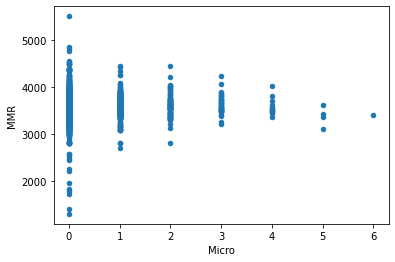

In [13]:
p.plot(x='Micro', y='MMR', kind='scatter')


<AxesSubplot: xlabel='MMR'>

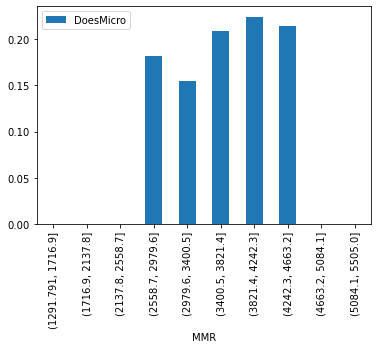

In [14]:
p.groupby(pd.cut(p['MMR'], 10)).mean().plot(kind='bar')